## Formatting units

With earthkit-plots, it's easy to format **units** in legends using flexible and readable templates. This notebook demonstrates how to:

- Format a label with units extracted from metadata
- Customise how units appear in plot labels

Let's start by getting some sample data:

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "storm_ophelia_wind_850.grib")
data.ls()

storm_ophelia_wind_850.grib:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20171016,0,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


We can inspect the units from our data's metadata using `metadata()` on a selected variable:

In [2]:
data.sel(short_name="u").metadata("units")

['m s**-1']

This shows that our wind data is in units of **metres per second**.

### Plotting with custom unit formatting

Let’s write a reusable helper function to plot this data and give control over:
- `label`: The template string for the legend
- `units`: Some units that we'd like to convert the data to (optional).

In [3]:
def plot_with_legend_label(label=None, units=None):
    chart = ek.plots.Map(domain=[-20, 5, 40, 60])
    
    style = ek.plots.styles.Style(
        colors="plasma_r",
        levels=range(0, 22, 2),
        units=units,
    )
    
    chart.quiver(data, style=style)
    chart.legend(label=label, location="right")
    
    chart.land()
    chart.coastlines()
    chart.gridlines()
    
    chart.title(
        "Storm Ophelia - {level} hPa wind speed and direction\n"
        "{time:%H:%M UTC on %-d %B %Y}"
    )
    
    chart.show()

### Unit formatting options

earthkit-plots uses a flexible formatting system for units in legend labels. You can include a `{units}` placeholder in your legend string, and specify a format using a colon (:), like `{units:~E}`, in order to create a $\LaTeX$ formatted string.

Below are the valid format spec options for units:

| Spec | Description                    | Example Format String  | Example Result            |
|------|--------------------------------|------------------------|---------------------------|
| `E`  | Exponential format             | `{units:~E}`           | $m \cdot s^{-1}$          |
| `F`  | Inline fractional format       | `{units:~F}`           | $m/s$                     |
| `L`  | Stacked fractional format      | `{units:~L}`           | $\frac{m}{s}$             |
| `R`  | Raw string from metadata       | `{units:R}`            | `m s**-1`                 |

> The `~` character denotes that you would like the unit names to be shortened, as in $m \cdot s^{-1}$.
> Excluding the `~` results in the full unit names being used, e.g. $meter \cdot second^{-1}$.
> Note that the `~` character is incompatible with the `R` format spec.

By default, earthkit-plots uses the `~E` format specification for units - which means **exponential** notation with **short names**, like $m \cdot s^{-1}$:

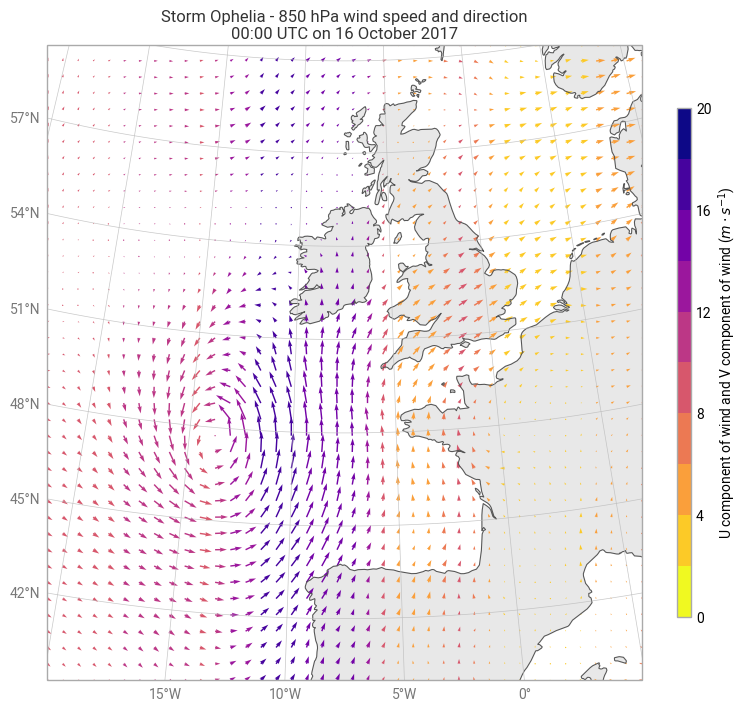

In [4]:
plot_with_legend_label()

This is the same as using the `~E` format spec:

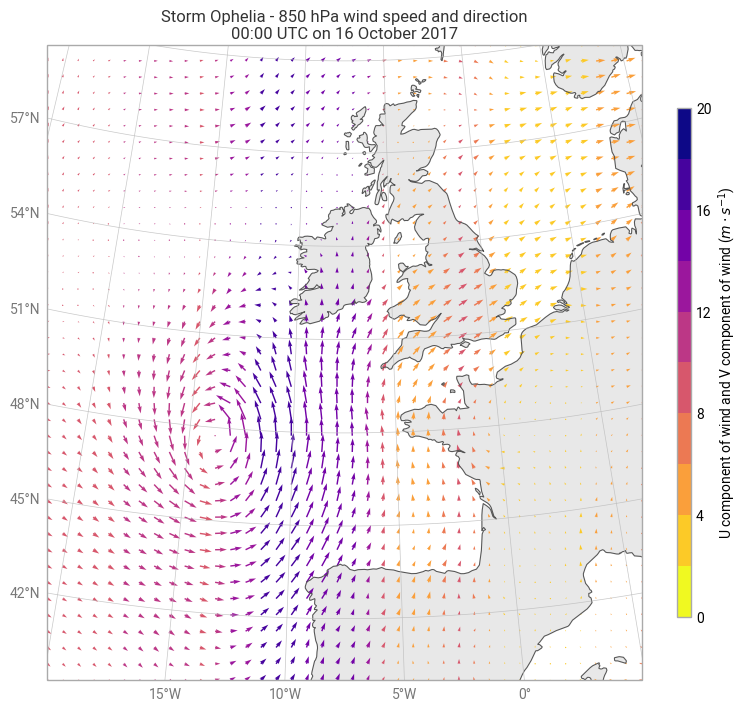

In [5]:
plot_with_legend_label("{variable_name} ({units:~E})")

You can use **inline** fractional notation (e.g. $m/s$) with `F`:

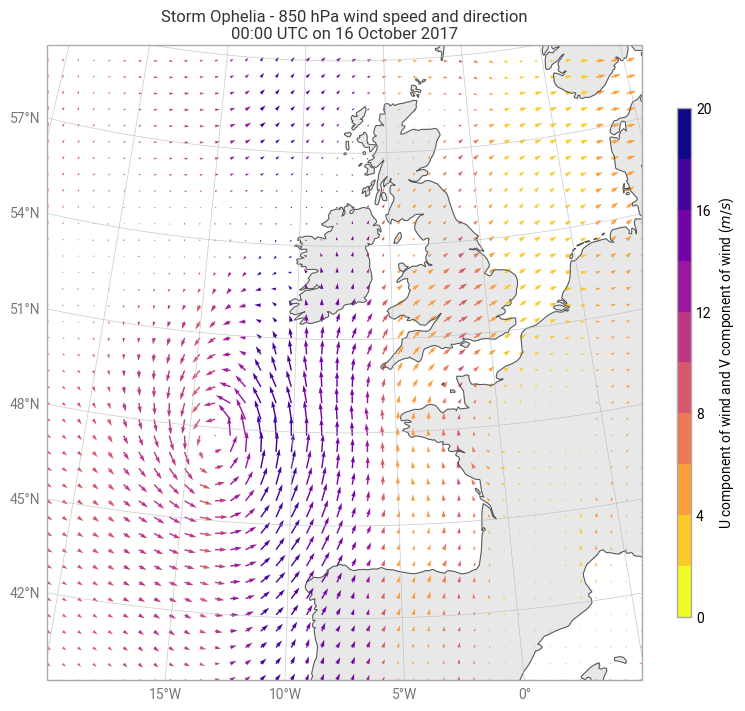

In [6]:
plot_with_legend_label("{variable_name} ({units:~F})")

And **stacked** fractional notation (e.g. $\frac{m}{s}$ with `L`:

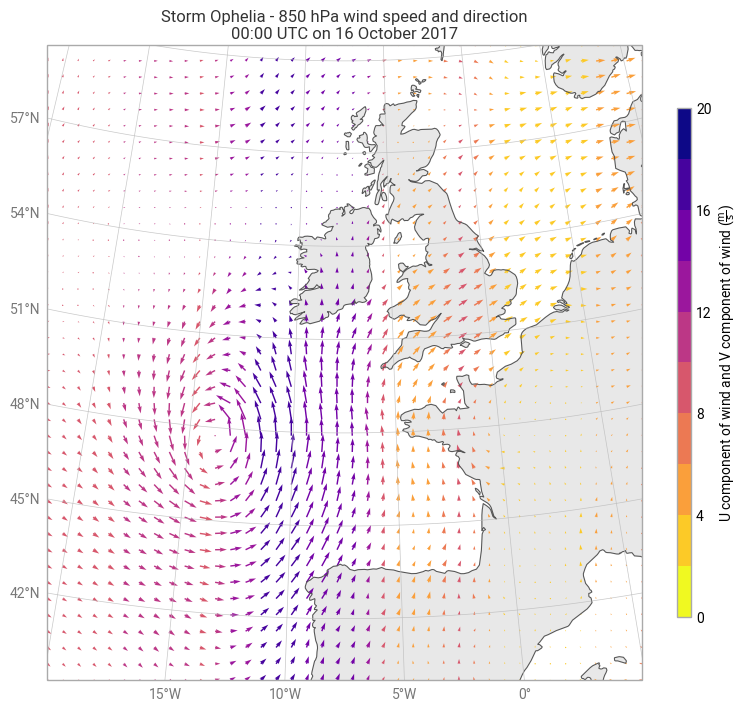

In [7]:
plot_with_legend_label("{variable_name} ({units:~L})")

Removing the tilde (`~`) character will make the units use the full unit names:

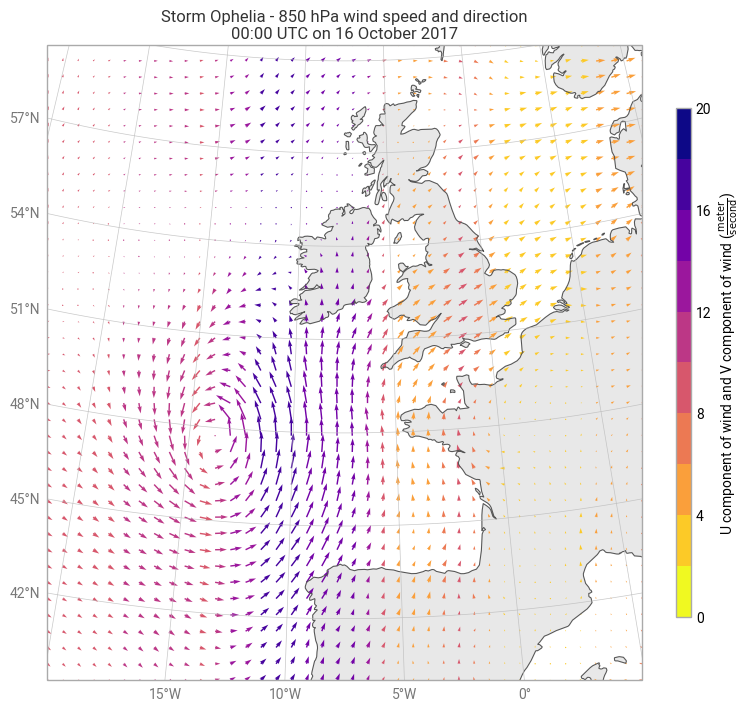

In [8]:
plot_with_legend_label("{variable_name} ({units:L})")

You can also use the original, raw units string with `R`:

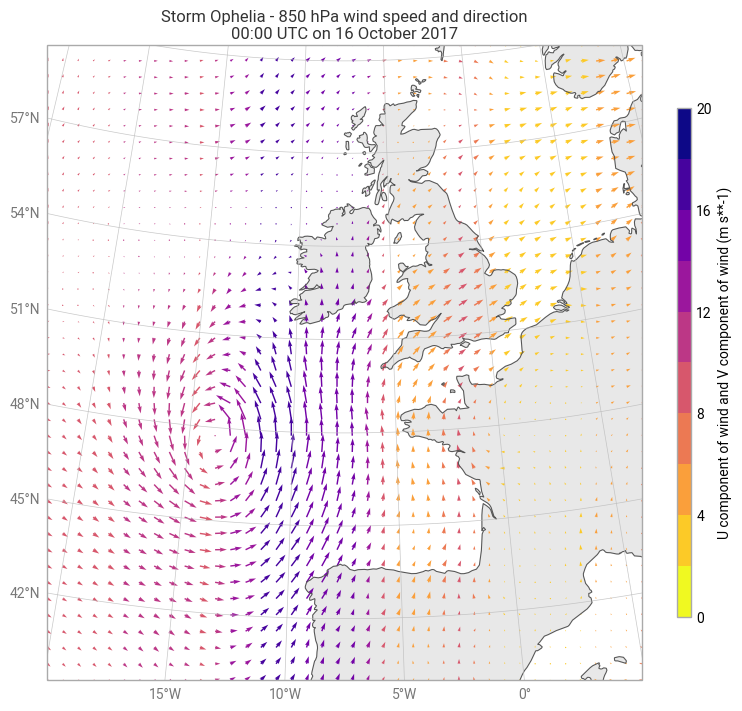

In [9]:
plot_with_legend_label("{variable_name} ({units:R})")

All of these features also work if you convert the units of your data:

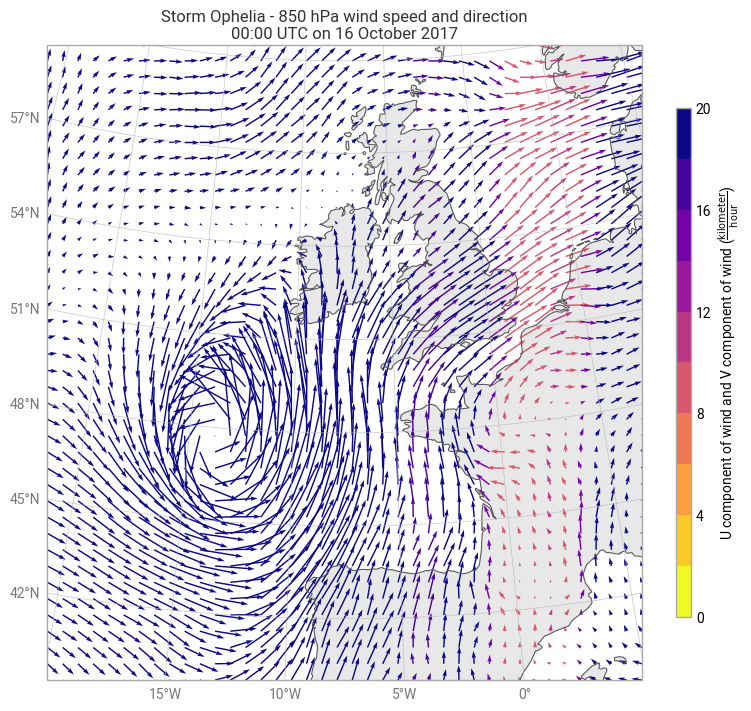

In [10]:
plot_with_legend_label("{variable_name} ({units:L})", units="km h-1")